In [1]:
import QUANTAXIS as QA
import pandas as pd
import tushare as ts
import numpy as np
# import TA-Lib as ta
import scipy.signal as signal
import matplotlib.pyplot as plt

In [41]:
#获取单只股票数据
one_stock_date = QA.QA_fetch_stock_day_adv('000001','2020-05-01','2020-08-22')
df_one_stock = one_stock_date.data
df_one_stock.head()
df_one_stock.droplevel(level=1,axis=0).head()

,open,high,low,close,volume,amount
date,,,,,,
2020-05-06,13.76,13.89,13.61,13.77,1008998.0,1.382727e+09
2020-05-07,13.76,13.76,13.60,13.69,662749.0,9.043495e+08
2020-05-08,13.76,14.02,13.68,13.95,934781.0,1.297925e+09
2020-05-11,13.92,14.13,13.90,14.00,612862.0,8.591566e+08
2020-05-12,13.95,14.05,13.72,13.79,558511.0,7.721095e+08


In [3]:
#获取所有股票列表
cn_stk_list = QA.QA_fetch_stock_list()
cn_stk_list.head(3)

,code,decimal_point,name,pre_close,sec,sse,volunit
code,,,,,,,
000001,000001,2,平安银行,1880.027500,stock_cn,sz,100
000002,000002,2,万 科Ａ,28.459999,stock_cn,sz,100
000004,000004,2,国农科技,22.530001,stock_cn,sz,100


In [4]:
# 排除ST和退市股
cn_stk_list = cn_stk_list[~cn_stk_list['name'].str.contains('ST|退')]

In [5]:
cn_stk_list.head(3)

,code,decimal_point,name,pre_close,sec,sse,volunit
code,,,,,,,
000001,000001,2,平安银行,1880.027500,stock_cn,sz,100
000002,000002,2,万 科Ａ,28.459999,stock_cn,sz,100
000004,000004,2,国农科技,22.530001,stock_cn,sz,100


In [6]:
# 获取整个市场非st非退股票代码
cn_stk_code = cn_stk_list['code'].to_list()
cn_stk_code[:5]

['000001', '000002', '000004', '000005', '000006']

In [7]:
# 用tushare获取所有股票列表
cn_stock_basic = ts.get_stock_basics()
cn_stock_basic.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
605009,N豪悦,造纸,浙江,12.73,0.27,1.07,18.91,9.34,5.83,0.71,...,24.05,3.73,20200911,8.14,7.63,0.00,0.00,41.81,27.11,32680.0
002984,N森麒麟,汽车配件,山东,23.04,0.69,6.50,68.06,26.97,34.67,11.66,...,8.07,3.38,20200911,20.85,3.21,0.00,0.00,33.66,17.95,132756.0
605358,N立昂微,半导体,浙江,18.61,0.41,4.01,50.42,20.00,22.14,6.09,...,4.32,1.64,20200911,5.57,1.39,0.00,0.00,36.61,11.75,45281.0
300459,金科文化,互联网,浙江,19.68,23.39,35.44,76.83,27.02,3.31,21.31,...,1.16,4.43,20150515,-9.62,-0.27,-33.24,2.69,91.42,51.32,75430.0
300317,珈伟新能,半导体,深圳,129.92,7.69,8.24,40.99,17.63,13.97,33.89,...,2.34,2.30,20120511,-22.93,-2.78,-21.47,161.87,40.54,4.29,34924.0


In [9]:
#获取所有指数
idx_list = QA.QA_fetch_index_list_adv()
idx_list.head()
idx_list.to_csv('all block.csv',encoding='utf-8-sig')

In [10]:
#只获取板块/概念指数
idx_wanted = idx_list['880301':'880981'].name
# idx_wanted.to_csv('all_blk.csv',encoding='utf_8_sig')
#所有行业指数名
industry_name = idx_wanted['880301':'880497']
#所有概念指数名
concept_name = idx_wanted['880501':'880981']
idx_wanted.head(5)

code
880301      煤炭
880302    煤炭开采
880303    焦炭加工
880305      电力
880306    水力发电
Name: name, dtype: object

In [10]:
industry_name.head()

code
880301      煤炭
880302    煤炭开采
880303    焦炭加工
880305      电力
880306    水力发电
Name: name, dtype: object

In [11]:
idx_wanted_code = idx_list['880301':].code.to_list()
industry_code = idx_list['880301':'880497'].code.to_list()  #132
concept_code = idx_list['880501':'880981'].code.to_list() #362
industry_code[:4]

['880301', '880302', '880303', '880305']

In [12]:
# 主要的科技和消费指数
tech_idx = ['880490','880491','880492','880493'] # 通讯，半导体，元器件，软件
consumer_idx = ['880381','880360','880390','880387'] #白酒，农林牧渔,汽车,家用电器

In [16]:
#获取所有板块5月到8月的数据
industry_data = QA.QA_fetch_index_day_adv(industry_code,'2020-08-01','2020-08-21')
concept_data = QA.QA_fetch_index_day_adv(concept_code,'2020-08-01','2020-08-21')

In [17]:
industry_code[1]

'880302'

In [18]:
#对个股进行标识，1：单涨停回调，2：变盘阳内回调...
def label_stock(data):
    pass

In [20]:
#找出行业/概念机会,返回列表
def label_blk_idx(data):
    pass
#找到行业板块机会
industry_opp = label_blk_idx(industry_data)
#找到概念板块机会
concept_opp = label_blk_idx(industry_data)

In [42]:
# industry_code
cnt = len(industry_code)
d_start = '2020-08-14'
d_end = '2020-08-14'
data = QA.QA_fetch_index_day_adv(industry_code[i],d_start,d_end)

In [43]:
#遍历所有板块，对所有板块进行label 
for i in range(cnt):
    data = QA.QA_fetch_index_day_adv(industry_code[i],d_start,d_end)
    industry_opp = label_blk_idx(data)

# industry_opp should contain 
# ma_ribbon 11+range,21+range,22+range  range is the how long period since 多头成立
# candle stick pattern

In [48]:
#传入板块名称,遍历板块个股
def find_opp_in_blk(opp_name):
    component = idx_wanted_code[opp_name]
    result = {}
    for code in component:
        data = QA.QA_fetch_stock_day_adv(code,d_start,d_end)
        label_stock(data) #遍历所有模型 eg 2yjs: [000001,000002,000003,etc]
        

In [49]:
result={}
result['000001'] = 'QS22'

In [51]:
result['000001'] = 'QS11'

In [52]:
result

{'000001': 'QS11'}

In [22]:
# 从行业/概念机会选择个股机会
# 获取板块个股
all_blk_component = QA.QA_fetch_stock_block_adv().view_block
all_blk_component.head(5)

blockname
300周期    [000001, 000002, 000069, 000166, 000627, 00065...
300非周    [000063, 000066, 000100, 000157, 000333, 00033...
3D打印     [000638, 000928, 000938, 000969, 000988, 00200...
4G5G     [300747, 002902, 300548, 000636, 603678, 30040...
5G概念     [000063, 000070, 000547, 000586, 000636, 00066...
dtype: object

In [42]:
stock_block_data = QA.QA_fetch_stock_block('000001')
stock_block_data.head()

,blockname,code,source,type
code,,,,
000001,沪深300,000001,tdx,yb
000001,深证成指,000001,tdx,yb
000001,融资融券,000001,tdx,yb
000001,沪深300,000001,tdx,zs
000001,深证成指,000001,tdx,zs


In [22]:
# stock_block_data.loc[stock_block_data['type'] == 'thshy']
stock_block_data[stock_block_data['type'] == 'thshy']

,blockname,code,source,type
code,,,,
000001,银行,000001,ths,thshy


In [20]:
def find_hot_stock():
    pass

In [21]:
def find_hot_blk():
    pass

In [ ]:
# 找出热门个股对应的板块
hot_stock = find_hot_stock()
for code in hot_stock:
    stock_block_data = QA.QA_fetch_stock_block('000001')
    stock_block = stock_block_data[stock_block_data['type']=='thshy']

In [ ]:
# 找出热门个股对应的概念


In [23]:
# gold_component = all_blk_component['黄金概念']
target_component = all_blk_component[industry_name[industry_code[1]]]
industry_name[industry_code[1]]

'煤炭开采'

In [24]:
target_min=QA.QA_fetch_stock_min_adv(target_component,'2020-08-20','2020-08-21')
target_min.data.head(5)

open   high    low  close     volume  \
datetime            code                                            
2020-08-20 09:31:00 000552   2.55   2.55   2.54   2.54   491300.0   
                    000780   2.65   2.65   2.61   2.62    75400.0   
                    000937   4.10   4.11   4.03   4.08  6282000.0   
                    000983   4.37   4.39   4.36   4.38  1040300.0   
                    002128  11.08  11.08  11.01  11.02   398800.0   

                                  amount  type  
datetime            code                        
2020-08-20 09:31:00 000552  1.248889e+06  1min  
                    000780  1.981440e+05  1min  
                    000937  2.568241e+07  1min  
                    000983  4.547676e+06  1min  
                    002128  4.409071e+06  1min

In [25]:
industry_min = QA.QA_fetch_index_min_adv(industry_code,'2020-08-21','2020-08-21')
len(industry_min)

31548

In [26]:
idx_name= idx_list['880301':'880981'].name 
idx_name.head()

code
880301      煤炭
880302    煤炭开采
880303    焦炭加工
880305      电力
880306    水力发电
Name: name, dtype: object

In [63]:
idx_name.loc['880301']

'煤炭'

In [25]:
###获取财务数据
df=QA.QA_fetch_financial_report_adv(cn_stk_code,'2017-01-01','2020-01-01',ltype ='CN')

In [ ]:
# 根据你是啥类型的数据，再用QA.QA_DataStrut_xxx()套一次。如：
# data为dataframe，日线数据
data=QA.QA_DataStruct_Day(data)
# 周线的DataStructure就是  QA.QA_DataStruct_Day(data.week)

In [36]:
# 自定义板块指数

x = QA.QAAnalysis.QAAnalysis_block(QA.QA_fetch_stock_block_adv().get_block('4G5G').code, start= '2019-01-01', end='2020-01-01')
# x = QA.QAAnalysis.QAAnalysis_block(QA.QA_fetch_stock_block_adv().get_block('煤炭').code, start= '2019-01-01', end='2020-01-01')

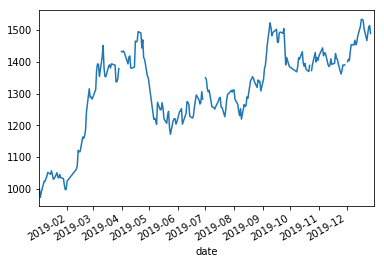

In [27]:
x.block_index().plot()

In [35]:
QA.QA_fetch_stock_block_adv().data

source   type
blockname code                
通达信88     000002    tdx     gn
          000028    tdx     gn
          000060    tdx     gn
          000069    tdx     gn
          000333    tdx     gn
          000538    tdx     gn
          000598    tdx     gn
          000617    tdx     gn
          000661    tdx     gn
          000708    tdx     gn
          000876    tdx     gn
          000895    tdx     gn
          000963    tdx     gn
          002078    tdx     gn
          002203    tdx     gn
          002271    tdx     gn
          002311    tdx     gn
          002352    tdx     gn
          002353    tdx     gn
          002415    tdx     gn
          002594    tdx     gn
          002812    tdx     gn
          002850    tdx     gn
          002912    tdx     gn
          002916    tdx     gn
          300383    tdx     gn
          300628    tdx     gn
          300750    tdx     gn
          300751    tdx     gn
          300760    tdx     gn
...                 ...    ...
制造业       600319    ths  zjhhy
          002694    ths  zjhhy
          000158    ths  zjhhy
          600462    ths  zjhhy
          300158    ths  zjhhy
          000587    ths  zjhhy
          300202    ths  zjhhy
          002624    ths  zjhhy
          603555    ths  zjhhy
          002247    ths  zjhhy
          300156    ths  zjhhy
          000913    ths  zjhhy
          000820    ths  zjhhy
          002638    ths  zjhhy
          002418    ths  zjhhy
          300078    ths  zjhhy
          002530    ths  zjhhy
          600203    ths  zjhhy
          002072    ths  zjhhy
          600165    ths  zjhhy
          600290    ths  zjhhy
          603399    ths  zjhhy
          300308    ths  zjhhy
          000576    ths  zjhhy
          002143    ths  zjhhy
          000960    ths  zjhhy
          300077    ths  zjhhy
          002219    ths  zjhhy
          300266    ths  zjhhy
          300090    ths  zjhhy

[69989 rows x 2 columns]

In [40]:
QA.QA_fetch_stock_block_adv().get_block('制造业').data

source   type
blockname code                
制造业       300278    ths  zjhhy
          300139    ths  zjhhy
          600810    ths  zjhhy
          002112    ths  zjhhy
          300390    ths  zjhhy
          002160    ths  zjhhy
          600481    ths  zjhhy
          002150    ths  zjhhy
          600532    ths  zjhhy
          002012    ths  zjhhy
          002301    ths  zjhhy
          002671    ths  zjhhy
          600197    ths  zjhhy
          300132    ths  zjhhy
          600847    ths  zjhhy
          603558    ths  zjhhy
          002101    ths  zjhhy
          600784    ths  zjhhy
          000973    ths  zjhhy
          000995    ths  zjhhy
          000048    ths  zjhhy
          601633    ths  zjhhy
          600866    ths  zjhhy
          002302    ths  zjhhy
          002427    ths  zjhhy
          600201    ths  zjhhy
          600448    ths  zjhhy
          600779    ths  zjhhy
          000976    ths  zjhhy
          300340    ths  zjhhy
...                 ...    ...
          600319    ths  zjhhy
          002694    ths  zjhhy
          000158    ths  zjhhy
          600462    ths  zjhhy
          300158    ths  zjhhy
          000587    ths  zjhhy
          300202    ths  zjhhy
          002624    ths  zjhhy
          603555    ths  zjhhy
          002247    ths  zjhhy
          300156    ths  zjhhy
          000913    ths  zjhhy
          000820    ths  zjhhy
          002638    ths  zjhhy
          002418    ths  zjhhy
          300078    ths  zjhhy
          002530    ths  zjhhy
          600203    ths  zjhhy
          002072    ths  zjhhy
          600165    ths  zjhhy
          600290    ths  zjhhy
          603399    ths  zjhhy
          300308    ths  zjhhy
          000576    ths  zjhhy
          002143    ths  zjhhy
          000960    ths  zjhhy
          300077    ths  zjhhy
          002219    ths  zjhhy
          300266    ths  zjhhy
          300090    ths  zjhhy

[1804 rows x 2 columns]